In [1]:
import socket, warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet")

In [2]:
import os

!pip install -Uqq fastai "duckduckgo_search>=6.2"

In [3]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time,json

In [4]:
import shutil

folder_path = 'bears'
shutil.rmtree(folder_path)

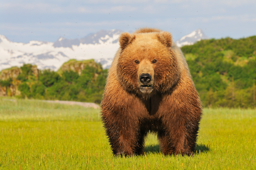

In [5]:
from fastdownload import download_url
dest = 'brown_bear.jpg'
download_url((search_images("brown bear", max_images=1))[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [6]:
searches = "grizzly", "black", "teddy"
path = Path("bears")

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} bear photos'))
    resize_images(path/o, max_size=400, dest=path/o)

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

30

In [8]:
bears = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed =43),
    get_y=parent_label,
    item_tfms=Resize(120)
)

In [9]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
dls = bears.dataloaders(path)

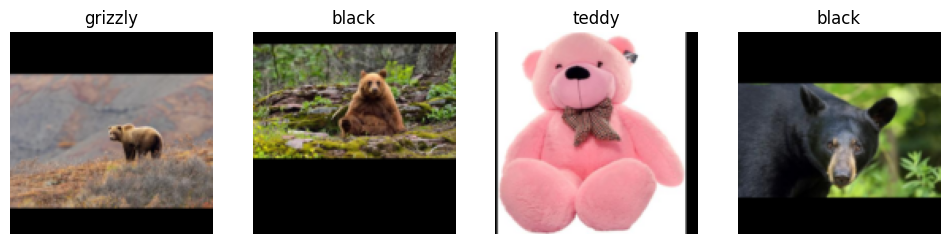

In [10]:
dls.show_batch(max_n=4,nrows=1)

In [11]:
learn = vision_learner(dls,resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\colpe/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|███████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 119MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.374690,0.143164,0.038095,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.298227,0.088433,0.038095,00:01
1,0.202646,0.075452,0.028571,00:01
2,0.176227,0.081832,0.047619,00:01
3,0.141483,0.093390,0.047619,00:01


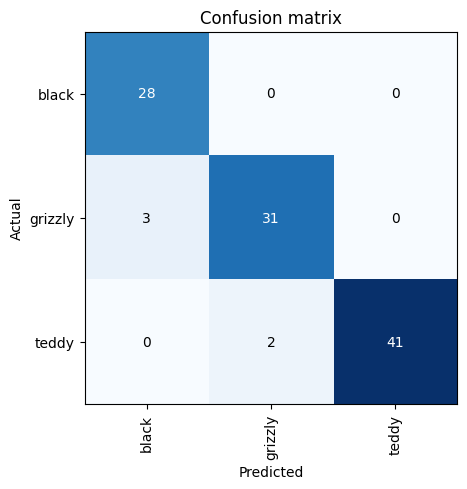

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

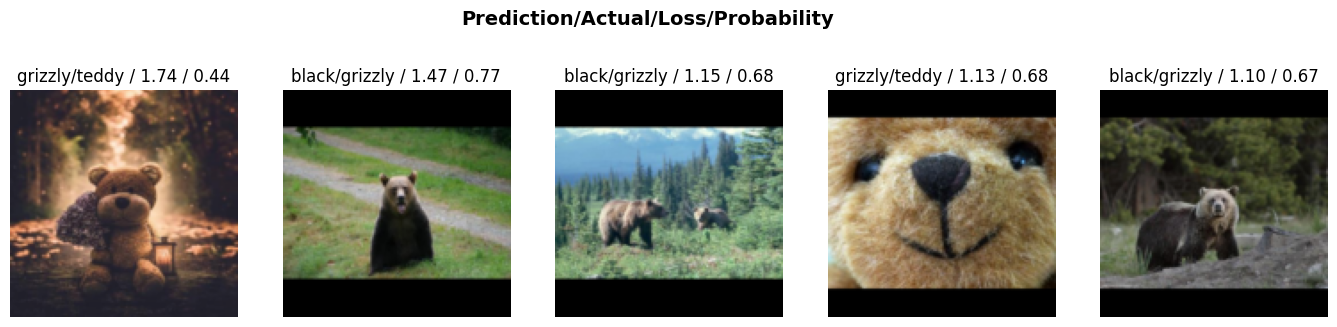

In [14]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [ ]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)


In [33]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(clearner.fns[idx]), path/cat)

In [35]:
which_bear,_,probs = learn.predict(PILImage.create("brown_bear.jpg"))
print(f"this is a: {which_bear}")
print(f"Porbability that it is grizzly: {probs[0]:.4f}")

this is a: grizzly
Porbability that it is grizzly: 0.0002


In [36]:
learn.export("model.pkl")